# User History and Relationship between Information
### 1. Get relationship between user history and retweet count
### 2. The older the more followers
### 3. Does more followers brings more retweets?

In [85]:
import importlib
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import re
import plotly.plotly as py
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# 1. Get relationship between user history and retweet count

In [40]:
df = pd.read_csv('Data/Data_Clean/Tweets_withINFO.csv')
df1=df.drop_duplicates()
df0=df1.fillna(value=0)
df0['text']=df0['text'].apply(lambda x: remove_http(x))

### Get the information of retweet, user created time, user name and follower count
### Get rid of duplicated tweets by text

In [101]:
df1=df0.loc[:, ['name','user_created','followers_count','retweet_count']]

In [102]:
df1.head()

,name,user_created,followers_count,retweet_count
0,United,Fri Mar 04 21:23:11 +0000 2011,913424,21757
1,United,Fri Mar 04 21:23:11 +0000 2011,913424,3098
2,United,Fri Mar 04 21:23:11 +0000 2011,913424,1373
3,Triston,Sun Jan 01 02:36:00 +0000 2012,1215,2235
4,TΞddy Rosenthal,Thu Jul 09 15:01:43 +0000 2015,80,2235


### Get when users are created

In [103]:
def get_year(x):
    datetime_object = datetime.datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y')
    time=datetime_object.strftime("%Y%m%d %H:%M:%S")
    y=time[:4]
    return y

In [104]:
df1['year']=df1['user_created'].apply(lambda x: get_year(x))

In [105]:
df1.head()

,name,user_created,followers_count,retweet_count,year
0,United,Fri Mar 04 21:23:11 +0000 2011,913424,21757,2011
1,United,Fri Mar 04 21:23:11 +0000 2011,913424,3098,2011
2,United,Fri Mar 04 21:23:11 +0000 2011,913424,1373,2011
3,Triston,Sun Jan 01 02:36:00 +0000 2012,1215,2235,2012
4,TΞddy Rosenthal,Thu Jul 09 15:01:43 +0000 2015,80,2235,2015


### Group retweet count by year

In [121]:
df2=DataFrame(df1.groupby(['year'])['retweet_count'].sum())

In [122]:
df2.head()

,retweet_count
year,
2006,1055
2007,1897163
2008,3504834
2009,19270520
2010,21085541


In [124]:
x1 = list(df2.index)
y1 = list(df2['retweet_count'])

### Plot a fig to show the relationship

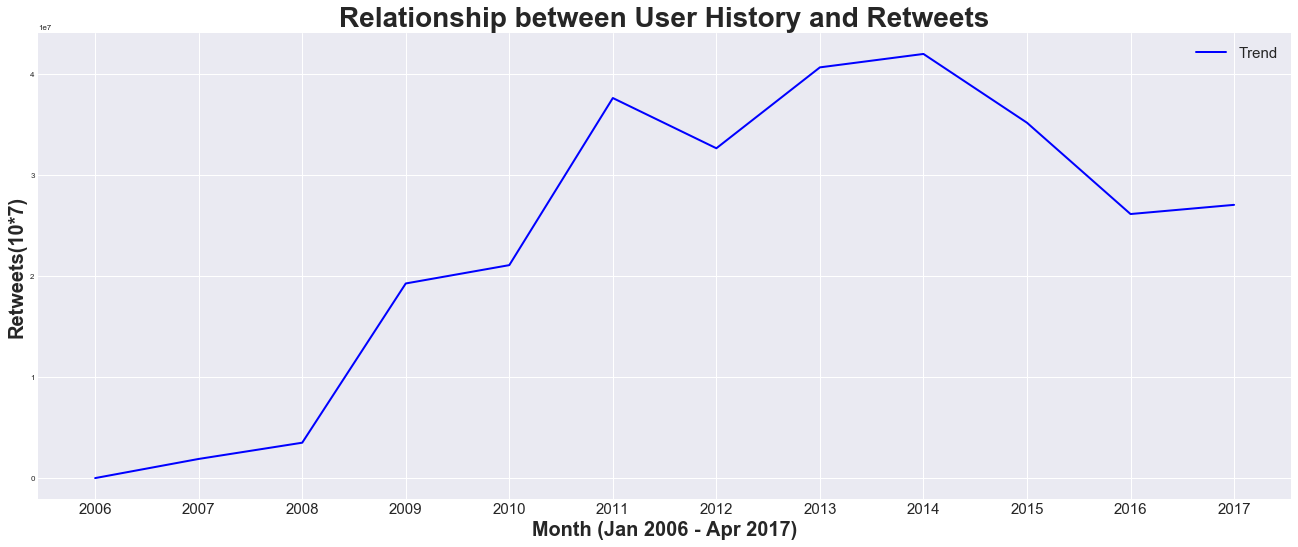

In [196]:
plt.style.use('seaborn-darkgrid')
plt.subplots(figsize=(20,8))
ax1 = plt.subplot(1,1,1)
ax1.plot(x1, y1, linewidth=2, linestyle='-',  label='Trend', color='Blue')
ax1.set_title('Relationship between User History and Retweets', fontsize=28,
             fontweight='bold')
plt.xlabel('Month (Jan 2006 - Apr 2017)', fontsize=20)
plt.ylabel('Retweets(10*7)', fontsize=20)
plt.xticks([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
ax1.set_xticklabels(['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],fontsize=15)
plt.legend(loc='upper right', fancybox=True, fontsize=15)
plt.savefig('History&Retweets.jpg')
plt.show()

# 2. Get relationship between user history and follower count

### Group follower count by year

In [134]:
df3=DataFrame(df1.groupby(['year'])['followers_count'].sum())

In [145]:
df3.head()

,followers_count
year,
2006,119204
2007,2721021398
2008,540568589
2009,935027638
2010,68594821


In [183]:
x2=list(df3.index)
y2=list(df3['followers_count'])

### Plot a fig to show the relation.

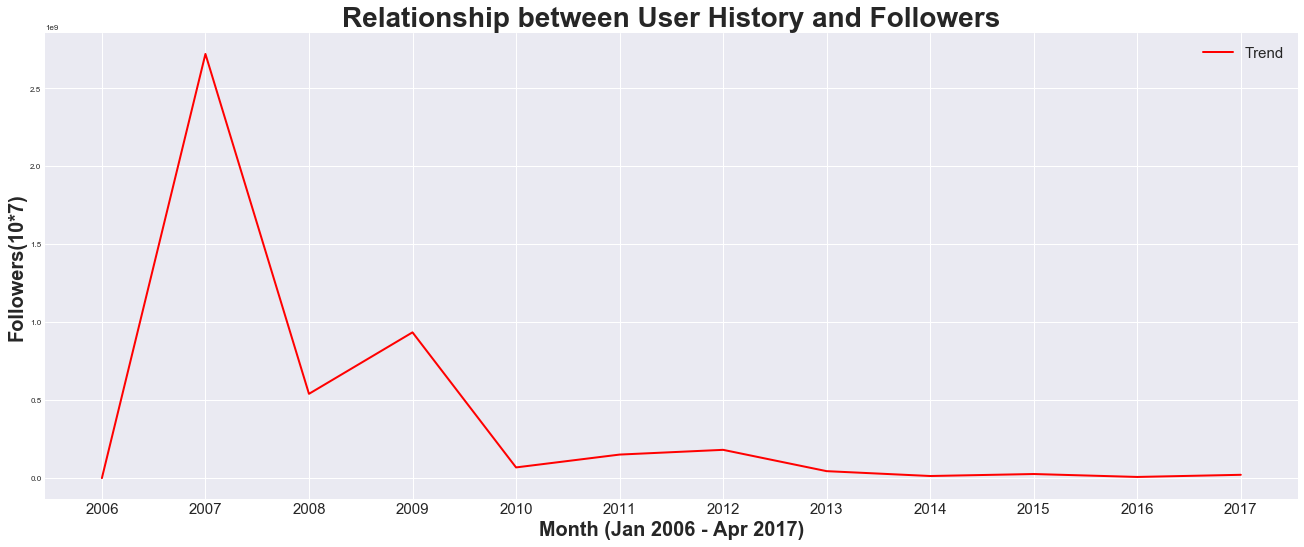

In [194]:
plt.style.use('seaborn-darkgrid')
plt.subplots(figsize=(20,8))
ax1 = plt.subplot(1,1,1)
ax1.plot(x2, y2, linewidth=2, linestyle='-',  label='Trend', color='Red')
ax1.set_title('Relationship between User History and Followers', fontsize=28,
             fontweight='bold')
plt.xlabel('Month (Jan 2006 - Apr 2017)', fontsize=20)
plt.ylabel('Followers(10*7)', fontsize=20)
plt.xticks([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
ax1.set_xticklabels(['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],fontsize=15)
plt.legend(loc='upper right', fancybox=True, fontsize=15)
plt.savefig('History&followers.jpg')
plt.show()

# 3. Does more followers brings more retweets?

### Group retweet and flower count by user name

In [191]:
df4=DataFrame(df1.groupby(['name'])['retweet_count'].sum())
df5=DataFrame(df1.groupby(['name'])['followers_count'].sum())

In [192]:
x3 = list(df5['followers_count'])
y3 = list(df4['retweet_count'])

### Plot a scatter to show the relation

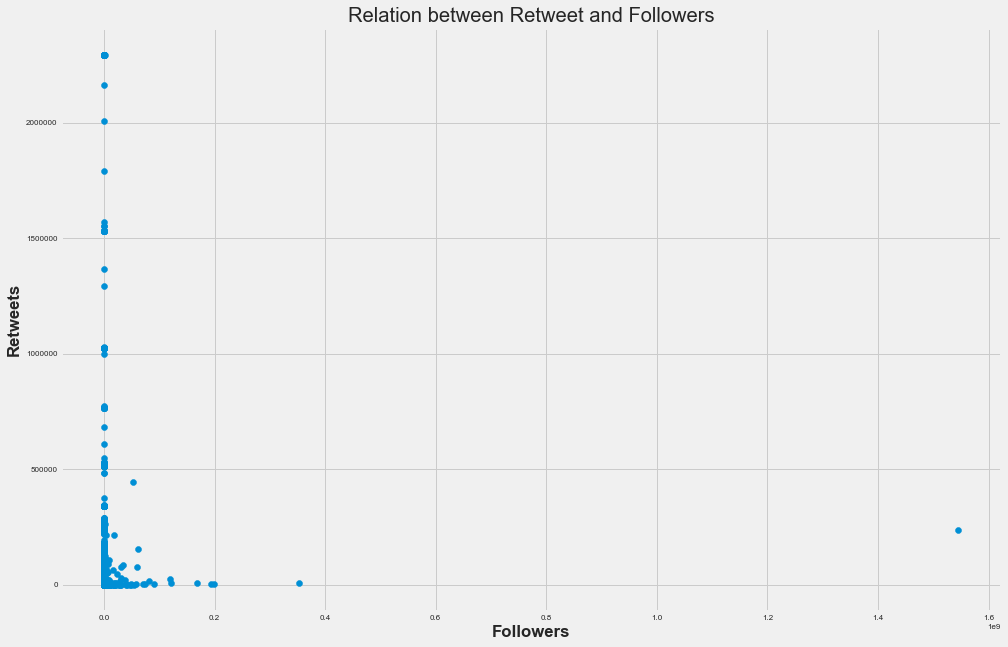

In [198]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,10))
plt.scatter(x3, y3)
plt.title('Relation between Retweet and Followers')
plt.xlabel('Followers')
plt.ylabel('Retweets')
plt.savefig('History&tweets.jpg')
plt.show()